In [13]:
import cv2
import numpy
import pandas
from PIL import Image
from skimage import data, io, filters
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
from PIL.ExifTags import TAGS


In [14]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"


In [15]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)


In [16]:
classLables = [] #empty list of python
file_name= 'Lables.txt'
with open(file_name,'rt') as fpt:
 classLables = fpt.read().rstrip('\n').split('\n')

In [17]:
print(classLables)


['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [18]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2=127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilnet => [-1,1]
model.setInputSwapRB(True)


< cv2.dnn.Model 0000025E709AFBD0>

In [41]:
img = cv2.imread('fruits.jpeg')


In [42]:
image_inf = Image.open('f.jpeg')


In [43]:
 #extract other basic metadata
info_dict = {
 "Filename": image_inf.filename,
 "Image Size": image_inf.size,
 "Image Height": image_inf.height,
 "Image Width": image_inf.width,
 "Image Format": image_inf.format,
 "Image Mode": image_inf.mode,
 "Image is Animated": getattr(image_inf, "is_animated", False),
 "Frames in Image": getattr(image_inf, "n_frames", 1)
}
for label,value in info_dict.items():
     print(f"{label:25}: {value}")


Filename                 : indir.jpeg
Image Size               : (225, 225)
Image Height             : 225
Image Width              : 225
Image Format             : JPEG
Image Mode               : RGB
Image is Animated        : False
Frames in Image          : 1


In [44]:
exifdata = image_inf.getexif()

In [45]:
# looping through all the tags present in exifdata
for tagid in exifdata:
 
 # getting the tag name instead of tag id
 tagname = TAGS.get(tagid, tagid)
 # passing the tagid to get its respective value
 value = exifdata.get(tagid)
 
 # printing the final result
 print(f"{tagname:25}: {value}")


In [46]:
print(type(image_inf))


<class 'PIL.JpegImagePlugin.JpegImageFile'>


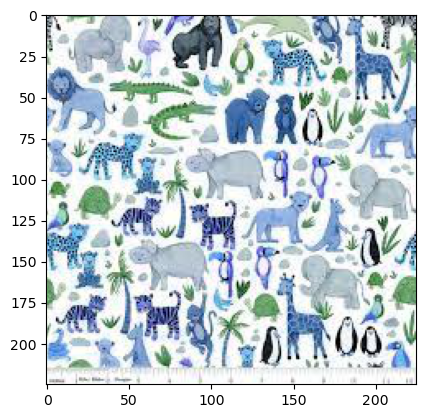

In [47]:
image = skimage.img_as_float(img)
plt.imshow(image)

In [48]:
ClassIndex , confidece, bbox = model.detect(img, confThreshold=0.5)


In [49]:
print(ClassIndex)

[82]


In [50]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
 #cv2.rectangle(frame, (x,y),(x+w , y+h),(255,0,0),2)
 #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = fon
 cv2.rectangle(img, boxes,(255, 0, 0), 2)
 cv2.putText(img,  classLables[ClassInd-1] , (boxes[0]+10,boxes[1]+40) , font, font_scale, (255, 255, 255), 1)


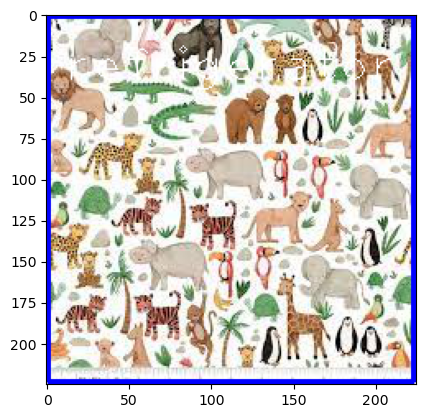

In [51]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
